In [68]:
#numpyのインストール
import numpy as np
#pandasのインストール
import pandas as pd
#statistics
import statistics as st
#statsmodelsのインストール
import statsmodels.api as sm
#時系列モデルのインストール
from statsmodels.tsa import stattools as st
from statsmodels.tsa.seasonal import seasonal_decompose as sd
#scikit-learnのインストール
import sklearn.linear_model as lm
#msnoのインストール
import missingno as msno
#pyplotのインストール
import matplotlib.pyplot as plt
#seabornのインストール
import seaborn as sns
%matplotlib inline
sns.set()
lr = lm.LogisticRegression()

In [69]:
df = pd.read_csv('data3.csv')
df.shape
#195×19次元

(183, 19)

In [70]:
df.head(10)

,year,avg_temp,avg_temp1,avg_temp2,sun,sun1,sun2,sun3,avg_wind,avg_wind1,avg_wind2,avg_cloud_quantity,avg_cloud_quantity1,avg_cloud_quantity2,rain_sum,rain_sum1,rain_sum2,rain_sum3,Year
0,2001/1/1,4.6,8,1,173.9,0,8,1,4.1,8,1,5.0,8,1,146.5,0,8,1,NaN
1,2001/2/1,6.2,8,1,146.9,0,8,1,3.6,8,1,6.1,8,1,38.5,0,8,1,NaN
2,2001/3/1,9.4,8,1,181.3,0,8,1,4.1,8,1,5.9,8,1,133.5,0,8,1,NaN
3,2001/4/1,15.0,8,1,226.6,0,8,1,3.9,8,1,5.6,8,1,64.0,0,8,1,NaN
4,2001/5/1,18.7,8,1,170.0,0,8,1,3.5,8,1,7.6,8,1,194.5,0,8,1,NaN
5,2001/6/1,22.2,8,1,114.5,0,8,1,3.0,8,1,8.8,8,1,141.0,0,8,1,NaN
6,2001/7/1,27.4,8,1,275.5,0,8,1,3.9,8,1,5.9,8,1,46.5,0,8,1,NaN
7,2001/8/1,25.8,8,1,132.8,0,8,1,2.8,8,1,8.4,8,1,162.5,0,8,1,NaN
8,2001/9/1,22.6,8,1,119.0,0,8,1,3.2,8,1,7.6,8,1,215.5,0,8,1,NaN
9,2001/10/1,18.1,8,1,149.4,0,8,1,3.3,8,1,6.4,8,1,306.5,0,8,1,NaN


In [74]:
#原系列
w_data = df.loc[:,['year','avg_temp','sun','avg_wind','rain_sum','avg_cloud_quantity']].set_index('year')

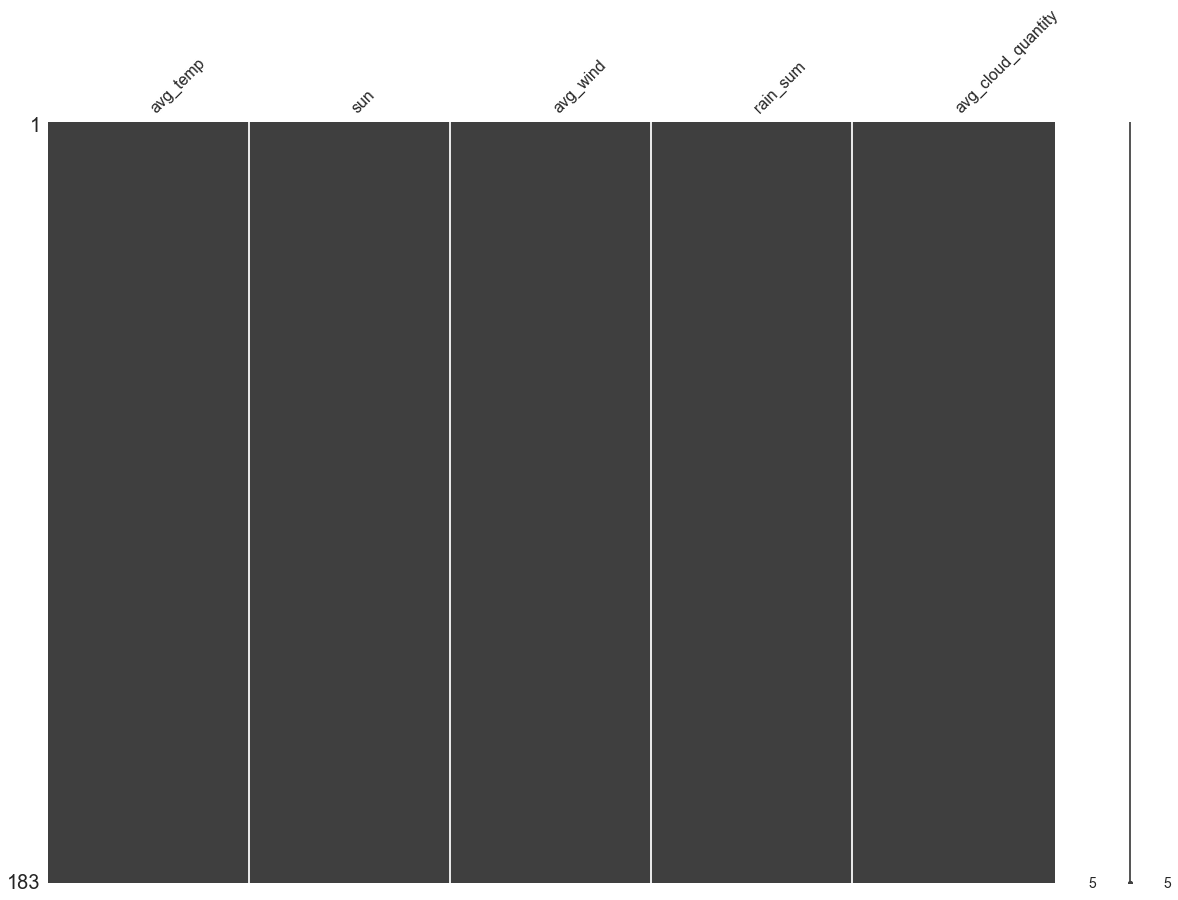

In [75]:
#データ欠損の確認 (欠損なし！)
msno.matrix(df=w_data,figsize=(20,14))

In [76]:
#原系列に対するADF検定
print (st.adfuller(w_data['avg_temp'].values.ravel()))
print (st.adfuller(w_data['sun'].values.ravel()))
print (st.adfuller(w_data['avg_wind'].values.ravel()))
print (st.adfuller(w_data['rain_sum'].values.ravel()))
print (st.adfuller(w_data['avg_cloud_quantity'].values.ravel()))

(-3.0735916943566344, 0.028570257964309134, 13, 169, {'1%': -3.4696482639876569, '5%': -2.8787989063084951, '10%': -2.5759713094779593}, 534.12008400846628)
(-5.2513985918225723, 6.8985898729093187e-06, 5, 177, {'1%': -3.4678453197999071, '5%': -2.8780117454974392, '10%': -2.575551186759871}, 1712.5427137768888)
(-1.8484999334505661, 0.3566622868963647, 13, 169, {'1%': -3.4696482639876569, '5%': -2.8787989063084951, '10%': -2.5759713094779593}, 126.90509974133818)
(-7.7312180161651618, 1.1240642266026284e-11, 9, 173, {'1%': -3.4687256239864017, '5%': -2.8783961376954363, '10%': -2.5757563410070499}, 2025.9494995038413)
(-2.8809550966213782, 0.047607906346807269, 12, 170, {'1%': -3.4694134689599019, '5%': -2.8786964197028295, '10%': -2.5759166089965397}, 470.8925248952072)


# Since P-value is less than 0.01 , these vars are 単位根

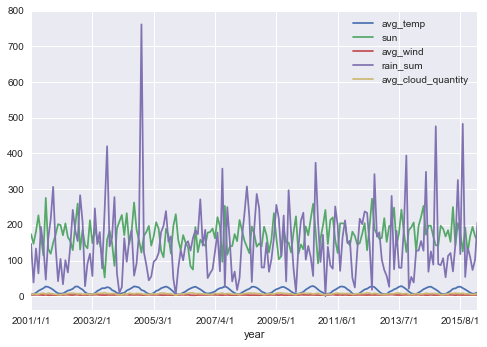

In [77]:
#原系列のplot
w_data.plot()

In [52]:
w_data.head()

,avg_temp,sun,avg_wind,rain_sum,avg_cloud_quantity
year,,,,,
2001/1/1,4.6,173.9,4.1,146.5,5.0
2001/2/1,6.2,146.9,3.6,38.5,6.1
2001/3/1,9.4,181.3,4.1,133.5,5.9
2001/4/1,15.0,226.6,3.9,64.0,5.6
2001/5/1,18.7,170.0,3.5,194.5,7.6


In [101]:
##各移動平均と差分系列を取得
#気温
temp_data = w_data.loc[:,['avg_temp']]
temp_moving_avg = temp_data.rolling(window=12).mean().fillna(w_data['avg_temp'].median())
temp_diff = temp_data.diff().dropna()
#日差し
sun_data = w_data.loc[:,['sun']]
sun_moving_avg = sun_data.rolling(window=12).mean()
sun_diff = sun_data.diff().dropna()
#風量
wind_data = w_data.loc[:,['avg_wind']]
wind_moving_avg = wind_data.rolling(window=12).mean()
wind_diff = wind_data.diff().dropna()
#雨量
rain_data = w_data.loc[:,['rain_sum']]
rain_moving_avg = rain_data.rolling(window=12).mean()
rain_diff = rain_data.diff().dropna()
#雲量
cloud_data = w_data.loc[:,['avg_cloud_quantity']]
cloud_moving_avg = cloud_data.rolling(window=12).mean()
cloud_diff = cloud_data.diff().dropna()

In [102]:
temp_diff.head()

,avg_temp
year,
2001/2/1,1.6
2001/3/1,3.2
2001/4/1,5.6
2001/5/1,3.7
2001/6/1,3.5


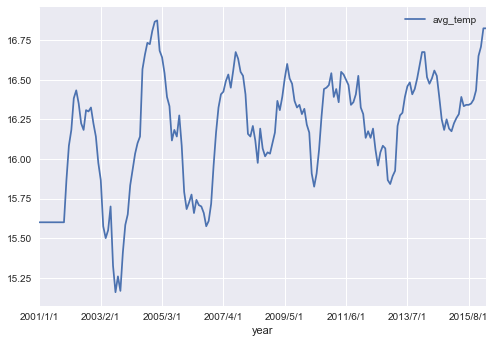

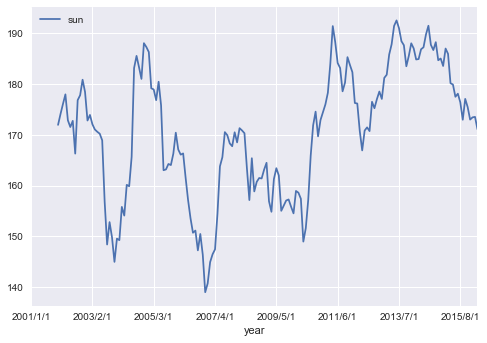

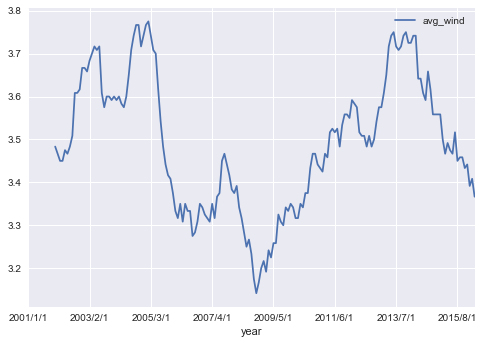

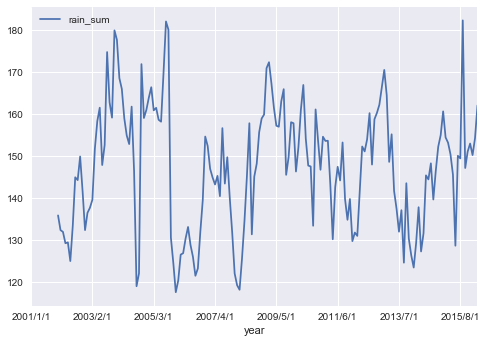

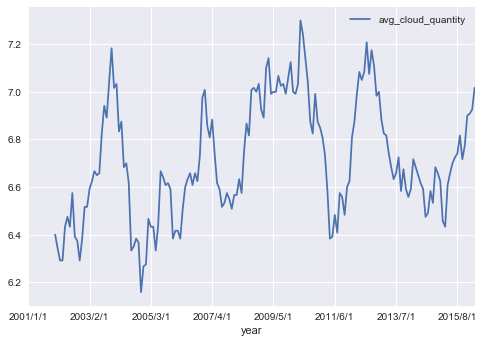

In [103]:
temp_moving_avg.plot()
sun_moving_avg.plot()
wind_moving_avg.plot()
rain_moving_avg.plot()
cloud_moving_avg.plot()

In [104]:
cloud_diff.head()

,avg_cloud_quantity
year,
2001/2/1,1.1
2001/3/1,-0.2
2001/4/1,-0.3
2001/5/1,2.0
2001/6/1,1.2


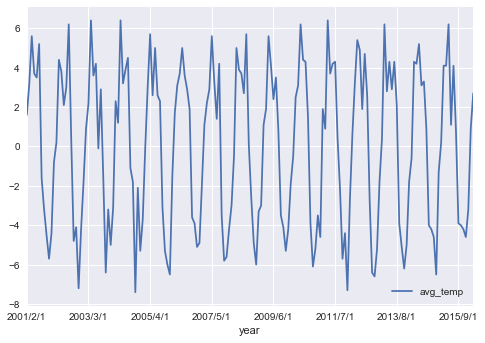

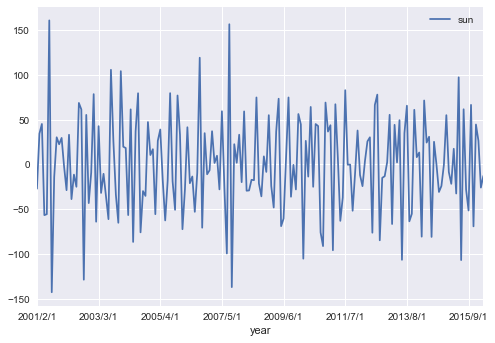

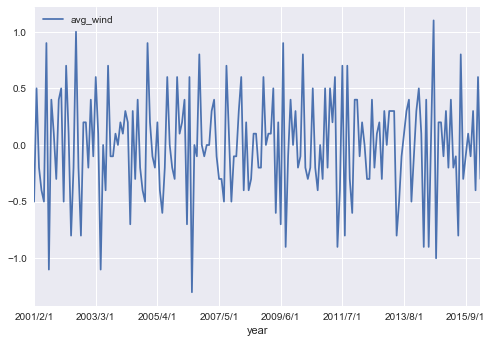

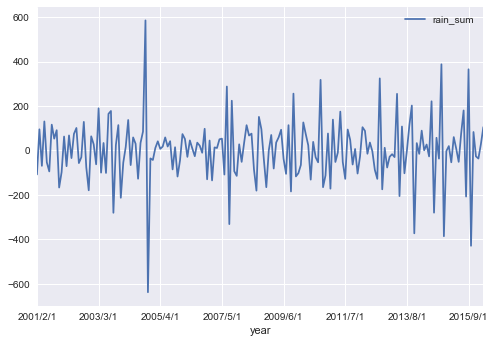

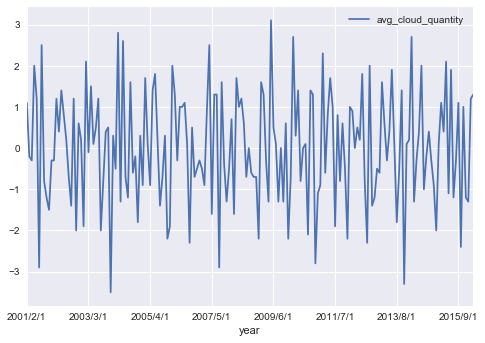

In [105]:
#差分系列のplot
temp_diff.plot()
sun_diff.plot()
wind_diff.plot()
rain_diff.plot()
cloud_diff.plot()

## 差分系列が定常過程なので、単位根過程として捉える

In [94]:
temp_diff.head()

,avg_temp
year,
2001/1/1,15.6
2001/2/1,1.6
2001/3/1,3.2
2001/4/1,5.6
2001/5/1,3.7


In [107]:
#差分系列をADF検定
print (st.adfuller(temp_diff['avg_temp'].values.ravel()))
print (st.adfuller(sun_diff['sun'].values.ravel()))
print (st.adfuller(wind_diff['avg_wind'].values.ravel()))
print (st.adfuller(rain_diff['rain_sum'].values.ravel()))
print (st.adfuller(cloud_diff['avg_cloud_quantity'].values.ravel()))

(-14.217605313252884, 1.6792483597318235e-26, 10, 171, {'1%': -3.4691814633722453, '5%': -2.8785951435329431, '10%': -2.5758625549741803}, 537.98163410378982)
(-6.8162777821349971, 2.0553151570578011e-09, 10, 171, {'1%': -3.4691814633722453, '5%': -2.8785951435329431, '10%': -2.5758625549741803}, 1713.5037981100934)
(-11.504052840492919, 4.4199252982985492e-21, 10, 171, {'1%': -3.4691814633722453, '5%': -2.8785951435329431, '10%': -2.5758625549741803}, 127.72384901353723)
(-9.0279897349845424, 5.5428649537218199e-15, 12, 169, {'1%': -3.4696482639876569, '5%': -2.8787989063084951, '10%': -2.5759713094779593}, 2034.2262543181309)
(-10.960150131270019, 8.3660338362667127e-20, 11, 170, {'1%': -3.4694134689599019, '5%': -2.8786964197028295, '10%': -2.5759166089965397}, 474.98732926883275)


# 単位根なので、差分系列同士で相関関係を確認する!

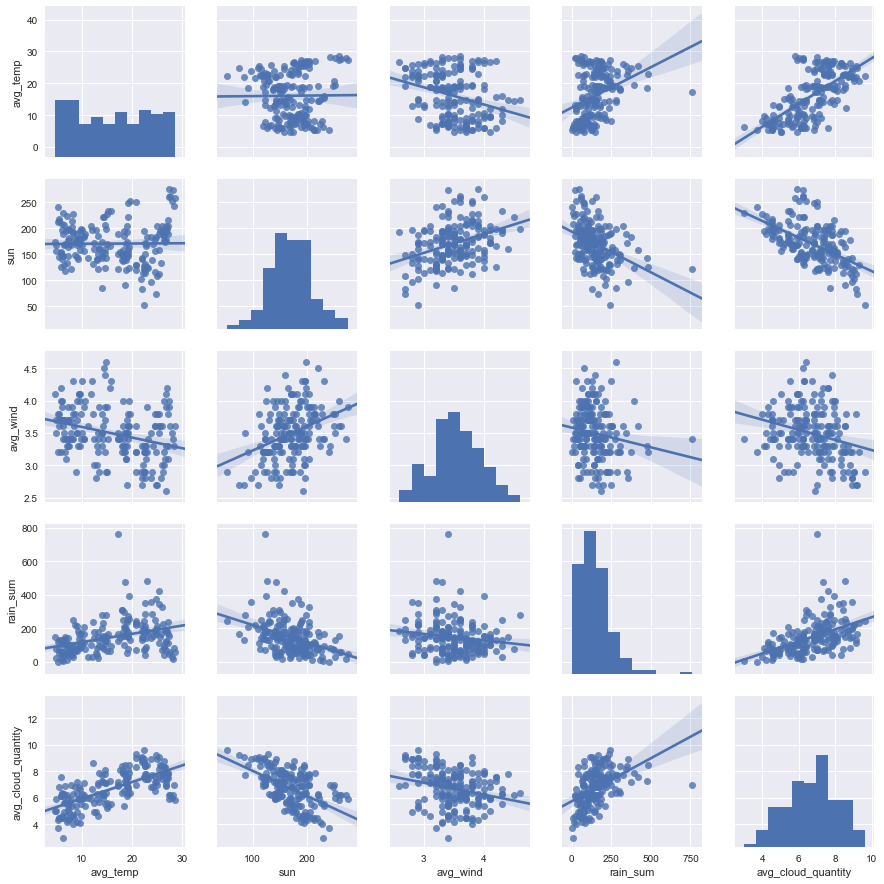

In [108]:
sns.pairplot(w_data,kind='reg')

In [110]:
correlation_matrix = np.corrcoef(w_data.transpose())

In [111]:
names = ['avg_temp','sun','avg_wind','rain_sum','cloud_quantity']

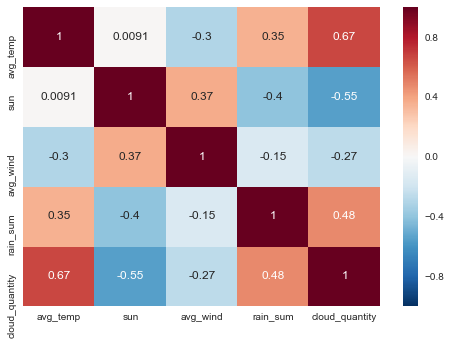

In [112]:
sns.heatmap(correlation_matrix, annot=True, xticklabels=names,yticklabels=names)

# Cloud quantityは日差しとか、気温とかとあまりにも相関するからバイバイする

In [113]:
w_data = w_data.drop(['avg_cloud_quantity'],axis=1)

# 横浜市のデータを読み込む！

In [234]:
econ = pd.read_excel('yokohamashi_data.xlsx',sheetname='all')

In [235]:
econ.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
世帯数分布(抽出率調整),277,278,275,282,284,282,283,285,289,292,294.00,296.00,297.00,300.00,305.00,306.00,306.00
集計世帯数,142,142,142,142,142,141,137,138,138,140,140.00,140.00,134.00,129.00,134.00,131.00,128.00
世帯人員(人),3.19,3.07,3.12,2.99,3.1,3.14,3.08,3.07,2.89,2.92,3.02,3.01,3.04,3.04,2.88,3.03,2.92
有業人員(人),1.37,1.33,1.33,1.34,1.3,1.26,1.26,1.25,1.22,1.22,1.30,1.22,1.18,1.26,1.12,1.26,1.07
世帯主の年齢(歳),53.3,53.6,55,53.8,54,52.9,54.4,56.4,58.4,56.4,56.40,55.40,58.50,58.10,58.50,59.10,61.20


In [236]:
econ = econ.T
econ.head()

,世帯数分布(抽出率調整),集計世帯数,世帯人員(人),有業人員(人),世帯主の年齢(歳),消費支出,食料,穀類,米,パン,...,仕送り金,(再掲) 教育関係費,(再掲) 教養娯楽関係費,(再掲) 移転支出(贈与金＋仕送り金),(再掲) 経常消費支出,(再掲) 情報通信関係費,(再掲) 消費支出(除く住居等) 2),現物総額,食料,エンゲル係数(％)
2000,277,142,3.19,1.37,53.3,356675,84656,8150,3426,2821,...,1637,21152,51058,14871,260084,…,…,9627,7292,23.7
2001,278,142,3.07,1.33,53.6,325637,77365,7404,3023,2569,...,3141,18107,46583,13732,248483,…,…,10346,7357,23.8
2002,275,142,3.12,1.33,55,321198,78858,7510,3209,2406,...,3922,20524,41524,15126,245254,…,…,8043,5784,24.6
2003,282,142,2.99,1.34,53.8,340914,78069,7511,3073,2515,...,2747,18969,43687,13240,254042,…,…,7594,5106,22.9
2004,284,142,3.1,1.3,54,353384,79350,7674,3257,2629,...,3614,25860,44041,19348,261893,…,…,9616,6583,22.5


In [233]:
econ = econ.reset_index(col_fill='year')
econ.head()

,index,世帯数分布(抽出率調整),集計世帯数,世帯人員(人),有業人員(人),世帯主の年齢(歳),消費支出,食料,穀類,米,...,仕送り金,(再掲) 教育関係費,(再掲) 教養娯楽関係費,(再掲) 移転支出(贈与金＋仕送り金),(再掲) 経常消費支出,(再掲) 情報通信関係費,(再掲) 消費支出(除く住居等) 2),現物総額,食料,エンゲル係数(％)
0,2000,277,142,3.19,1.37,53.3,356675,84656,8150,3426,...,1637,21152,51058,14871,260084,…,…,9627,7292,23.7
1,2001,278,142,3.07,1.33,53.6,325637,77365,7404,3023,...,3141,18107,46583,13732,248483,…,…,10346,7357,23.8
2,2002,275,142,3.12,1.33,55,321198,78858,7510,3209,...,3922,20524,41524,15126,245254,…,…,8043,5784,24.6
3,2003,282,142,2.99,1.34,53.8,340914,78069,7511,3073,...,2747,18969,43687,13240,254042,…,…,7594,5106,22.9
4,2004,284,142,3.1,1.3,54,353384,79350,7674,3257,...,3614,25860,44041,19348,261893,…,…,9616,6583,22.5


In [224]:
# データの中身
econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Columns: 137 entries, index to エンゲル係数(％)
dtypes: int64(1), object(136)
memory usage: 18.3+ KB


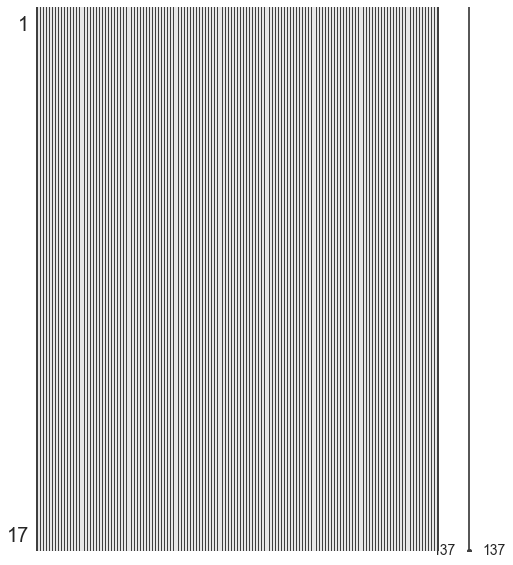

In [225]:
#欠損値確認
msno.matrix(df=econ,figsize=(8,10))

In [228]:
#消費支出の総額と各項目の
y_econ = econ.loc[:,['消費支出','食料','住居','光熱・水道','家具・家事用品','被服及び履物','保健医療','交通・通信','教育','教養娯楽','その他の消費支出','現物総額','エンゲル係数(％)']]

In [229]:
y_econ.head()

,消費支出,食料,食料,食料,住居,光熱・水道,家具・家事用品,家具・家事用品,被服及び履物,被服及び履物,保健医療,交通・通信,教育,教養娯楽,教養娯楽,その他の消費支出,現物総額,エンゲル係数(％)
0,356675,84656,7911,7292,22711,23082,12000,1142,16556,1036,13514,48107,18118,42644,2131,75288,9627,23.7
1,325637,77365,7938,7357,24052,22001,10495,559,16821,958,11380,36618,15191,39148,1675,72565,10346,23.8
2,321198,78858,6476,5784,23960,22051,10925,238,15668,970,12956,37993,15846,35745,1008,67196,8043,24.6
3,340914,78069,7280,5106,25416,20791,11272,553,18277,1084,14293,44244,15961,35997,2211,76596,7594,22.9
4,353384,79350,7337,6583,24643,21167,12929,577,15981,1176,14311,43288,20614,36188,1855,84914,9616,22.5


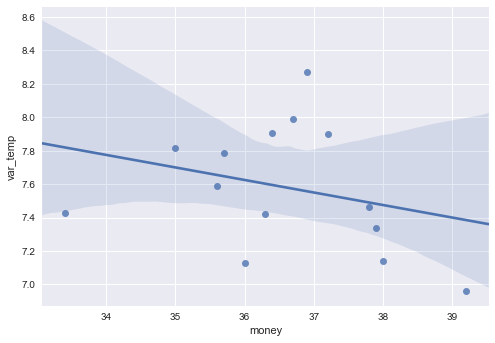

In [81]:
sns.regplot(x=yt_data["money"], y=yt_data["var_temp"])

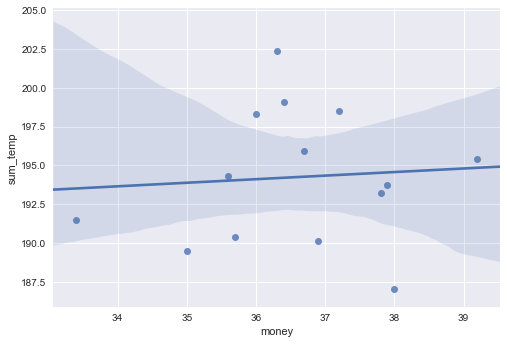

In [82]:
sns.regplot(x=yt_data["money"], y=yt_data["sum_temp"])

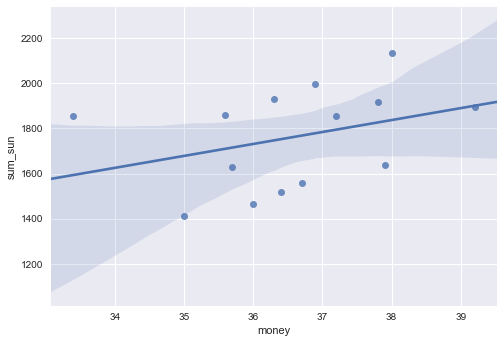

In [83]:
sns.regplot(x=yt_data["money"], y=yt_data["sum_sun"])

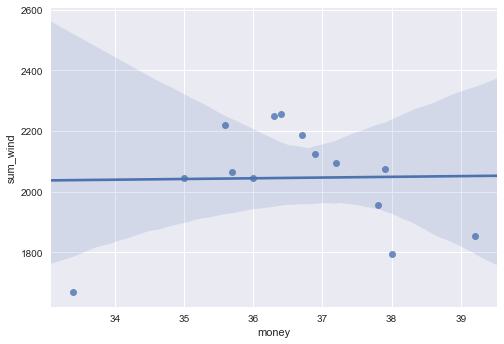

In [84]:
sns.regplot(x=yt_data["money"], y=yt_data["sum_wind"])

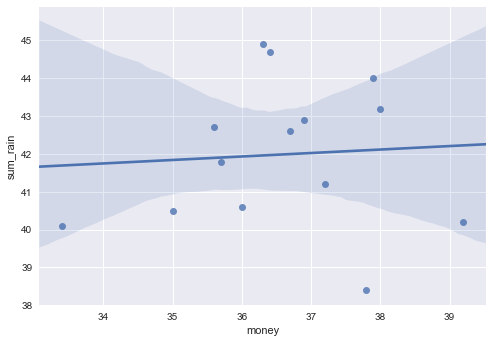

In [85]:
sns.regplot(x=yt_data["money"], y=yt_data["sum_rain"])

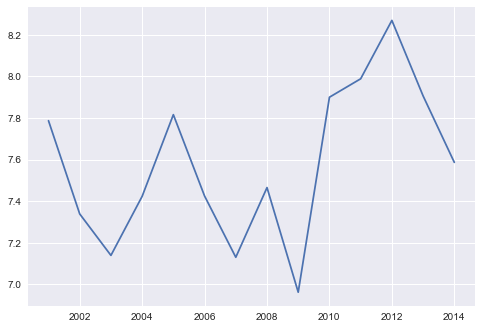

In [86]:
plt.plot( 'year','var_temp', data=yt_data)
plt.show()

In [87]:
yy_data = yt_data.set_index(['year'])

In [88]:
yy_data = np.log(yy_data.loc[:,['money','var_temp','sum_temp','sum_sun','sum_wind','sum_rain']])

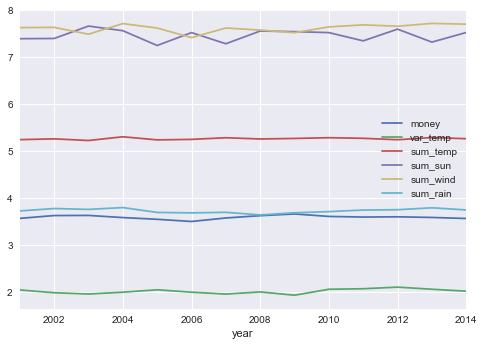

In [89]:
yy_data.plot()

In [90]:
#差分だお
yy_diff = yy_data.diff()

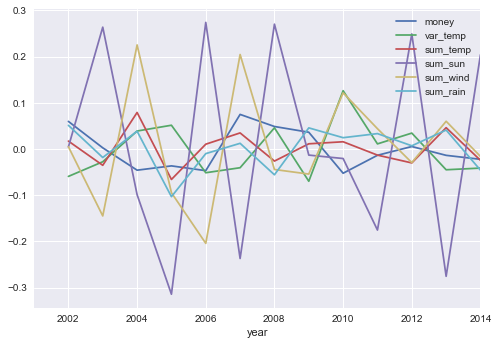

In [91]:
yy_diff.plot()

In [93]:
yy_moving_avg = yy_data.rolling(window=3).mean()

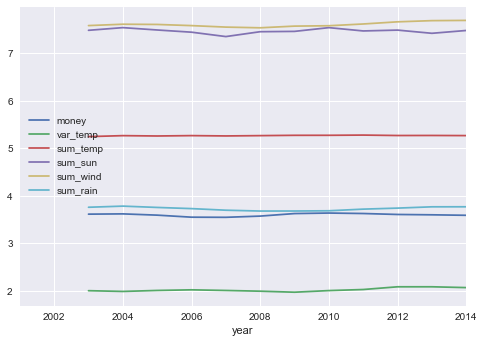

In [94]:
yy_moving_avg.plot()

In [102]:
#単位根検定
print (st.adfuller(yt_data['money'].values.ravel()))
print (st.adfuller(yt_data['var_temp'].values.ravel()))
print (st.adfuller(yt_data['sum_temp'].values.ravel()))
print (st.adfuller(yt_data['sum_sun'].values.ravel()))
print (st.adfuller(yt_data['sum_wind'].values.ravel()))
print (st.adfuller(yt_data['sum_rain'].values.ravel()))

(-1.2257848416414092, 0.66240655131701698, 4, 9, {'1%': -4.4731350480109739, '5%': -3.2898806035665298, '10%': -2.7723823456790124}, -328.58976670430286)
(-0.87049320860232349, 0.7975340891607402, 4, 9, {'1%': -4.4731350480109739, '5%': -3.2898806035665298, '10%': -2.7723823456790124}, -328.57627141945704)
(-0.0, 0.95853208606005602, 8, 5, {'1%': -6.0451139999999999, '5%': -3.9292800000000003, '10%': -2.9868100000000002}, -310.12917945736433)
(-3.7543904069527896, 0.0034099922614910343, 4, 9, {'1%': -4.4731350480109739, '5%': -3.2898806035665298, '10%': -2.7723823456790124}, -270.65463287786781)
(-0.0, 0.95853208606005602, 6, 7, {'1%': -4.9386902332361515, '5%': -3.4775828571428571, '10%': -2.8438679591836733}, -280.73326151433639)
(0.0, 0.95853208606005602, 8, 5, {'1%': -6.0451139999999999, '5%': -3.9292800000000003, '10%': -2.9868100000000002}, -329.68862103848073)


/Users/Taishi/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1148: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
